- remove duplicate
- missing data
- outliers
- normality
- multicollinearity
- correlation
- feature selection
- create new features
- labeling
- modeling
- hyper parameter tuning

In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [13]:
all_df = pd.read_csv("C:/Users/user/Desktop/UCI SECOM dataset/uci-secom.csv")
all_df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [34]:
all_df.shape

(1567, 592)

In [53]:
# remove row duplicates
all_df.drop_duplicates()
all_df.shape

(1567, 592)

In [54]:
# remove column duplicates
all_df.T.drop_duplicates().T
all_df.shape

(1567, 592)

In [ ]:
# train test split

# 欠損値処理

In [231]:
total_null = all_df.isnull().sum().sort_values(ascending=False)
percent_null = (all_df.isnull().sum()/all_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_null, percent_null], axis=1, keys=['Total', 'Percent'])
missing_data.head(50)

,Total,Percent
158,1429,0.911934
292,1429,0.911934
293,1429,0.911934
157,1429,0.911934
85,1341,0.855775
492,1341,0.855775
220,1341,0.855775
358,1341,0.855775
517,1018,0.649649
245,1018,0.649649


<AxesSubplot:>

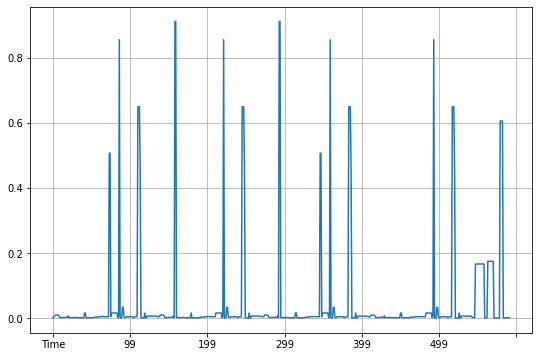

In [186]:
#null count plot
null_count = all_df.isnull().sum()/all_df.isnull().count()
null_count.plot(figsize=(9,6), grid=True)

<AxesSubplot:>

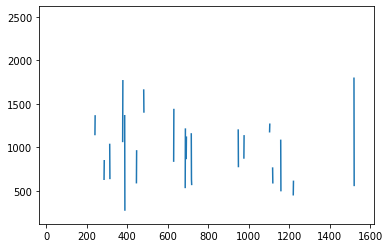

In [225]:
# 欠損値91%
all_df['158'].plot()

<AxesSubplot:>

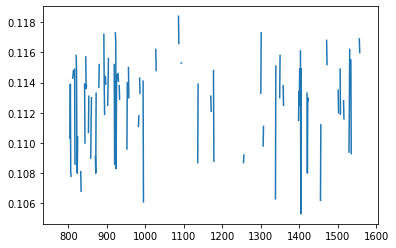

In [226]:
# 欠損値86%
all_df['85'].plot()

<AxesSubplot:>

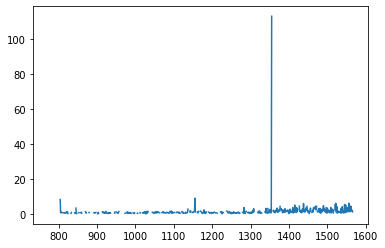

In [228]:
# 欠損値65%
all_df['517'].plot()

<AxesSubplot:>

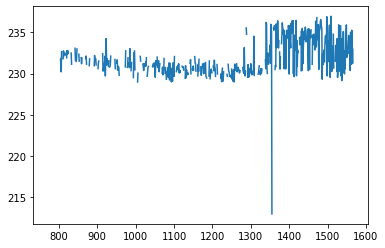

In [229]:
# 欠損値65%
all_df['111'].plot()

In [242]:
# 欠損値が8割以上列を削除
del_null_col_df = all_df.drop(missing_data[missing_data['Percent'] > 0.8].index, axis=1)
print('before: {}'.format(all_df.shape) + ', after: {}'.format(del_null_col_df.shape))


before: (1567, 592), after: (1567, 584)


In [251]:
# 他の欠損値ある列の欠損値を中間値で埋める
filled_null_df = del_null_col_df.fillna(del_null_col_df.median())
filled_null_df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_21252\2123326310.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  filled_null_df = del_null_col_df.fillna(del_null_col_df.median())


,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,72.2889,0.5005,0.0118,0.0035,2.3630,0.0205,0.0148,0.0046,71.9005,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,72.2889,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


<AxesSubplot:>

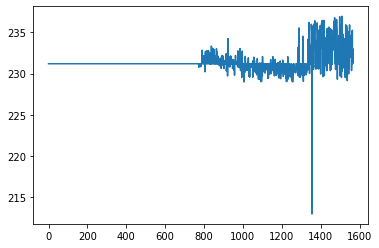

In [252]:
filled_null_df['111'].plot()

In [254]:
filled_null_df.isnull().sum().value_counts()

0    584
dtype: int64

# データ可視化

In [255]:
filled_null_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.0,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,3014.441551,2495.866110,2200.551958,1395.383474,4.171281,100.0,101.116476,0.121825,1.462860,-0.000842,...,82.403069,0.500096,0.015317,0.003846,3.067628,0.021458,0.016474,0.005283,99.652345,-0.867262
std,73.480841,80.228143,29.380973,439.837330,56.103721,0.0,6.209385,0.008936,0.073849,0.015107,...,56.348694,0.003403,0.017174,0.003719,3.576899,0.012354,0.008805,0.002866,93.864558,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.665000,2452.885000,2181.099950,1083.885800,1.017700,100.0,97.937800,0.121100,1.411250,-0.010800,...,72.288900,0.497900,0.011600,0.003100,2.306500,0.013450,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.540000,2538.745000,2218.055500,1590.169900,1.518800,100.0,104.530000,0.123800,1.516850,0.008400,...,72.288900,0.502350,0.016500,0.004100,3.294950,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [256]:
filled_null_df.shape

(1567, 584)

In [257]:
temp = pd.DataFrame(filled_null_df['Pass/Fail'].value_counts()/filled_null_df['Pass/Fail'].count())
temp

,Pass/Fail
-1,0.933631
1,0.066369


<AxesSubplot:ylabel='Pass/Fail'>

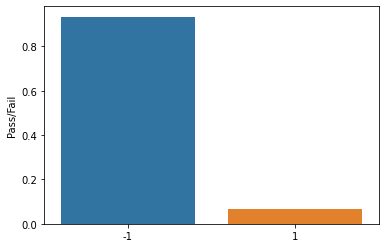

In [258]:
# 目的変数の分布
sns.barplot(x= temp.index,y='Pass/Fail', data=temp)

In [275]:
X = temp_df.drop(['Pass/Fail'], axis=1)
y = temp_df['Pass/Fail']

In [276]:
fs = SelectKBest(score_func=f_classif, k=10)
X_selected = fs.fit_transform(X, y)

print(X_selected.shape)

(1567, 10)


In [282]:
X_selected = pd.DataFrame(X_selected)
total = pd.concat([X_selected, y], axis=1)
total

,0,1,2,3,4,5,6,7,8,9,Pass/Fail
0,-5419.00,64.2333,-1.7264,-0.0042,0.0215,18.7673,33.1562,10.0503,2.7073,64.6707,-1
1,-5441.50,68.4222,0.8073,-0.0045,0.0142,10.4383,2.2655,8.6336,5.7093,141.4365,-1
2,-5447.75,67.1333,23.8245,-0.0026,0.0105,10.3162,29.1663,14.2503,5.7650,240.7767,1
3,-5468.25,62.9333,24.3791,-0.0059,0.0407,15.7089,13.4051,5.1760,5.3899,113.5593,-1
4,-5476.25,62.8333,-12.2945,-0.0045,0.0246,12.7642,10.7390,11.4064,2.0088,148.0663,-1
...,...,...,...,...,...,...,...,...,...,...,...
1562,-5418.75,71.1444,2.8182,-0.0094,0.0226,23.6217,12.8067,9.5963,8.1372,53.1915,-1
1563,-6408.75,72.8444,-3.3555,-0.0116,0.0226,7.8642,4.1273,5.0598,2.3859,29.4372,-1
1564,-5153.25,71.2667,1.1664,-0.0142,0.0226,22.8594,20.0222,8.4300,3.8076,54.8330,-1
1565,-5271.75,70.5111,4.4682,-0.0087,0.0226,33.0061,9.4153,7.6117,9.7082,78.4993,-1


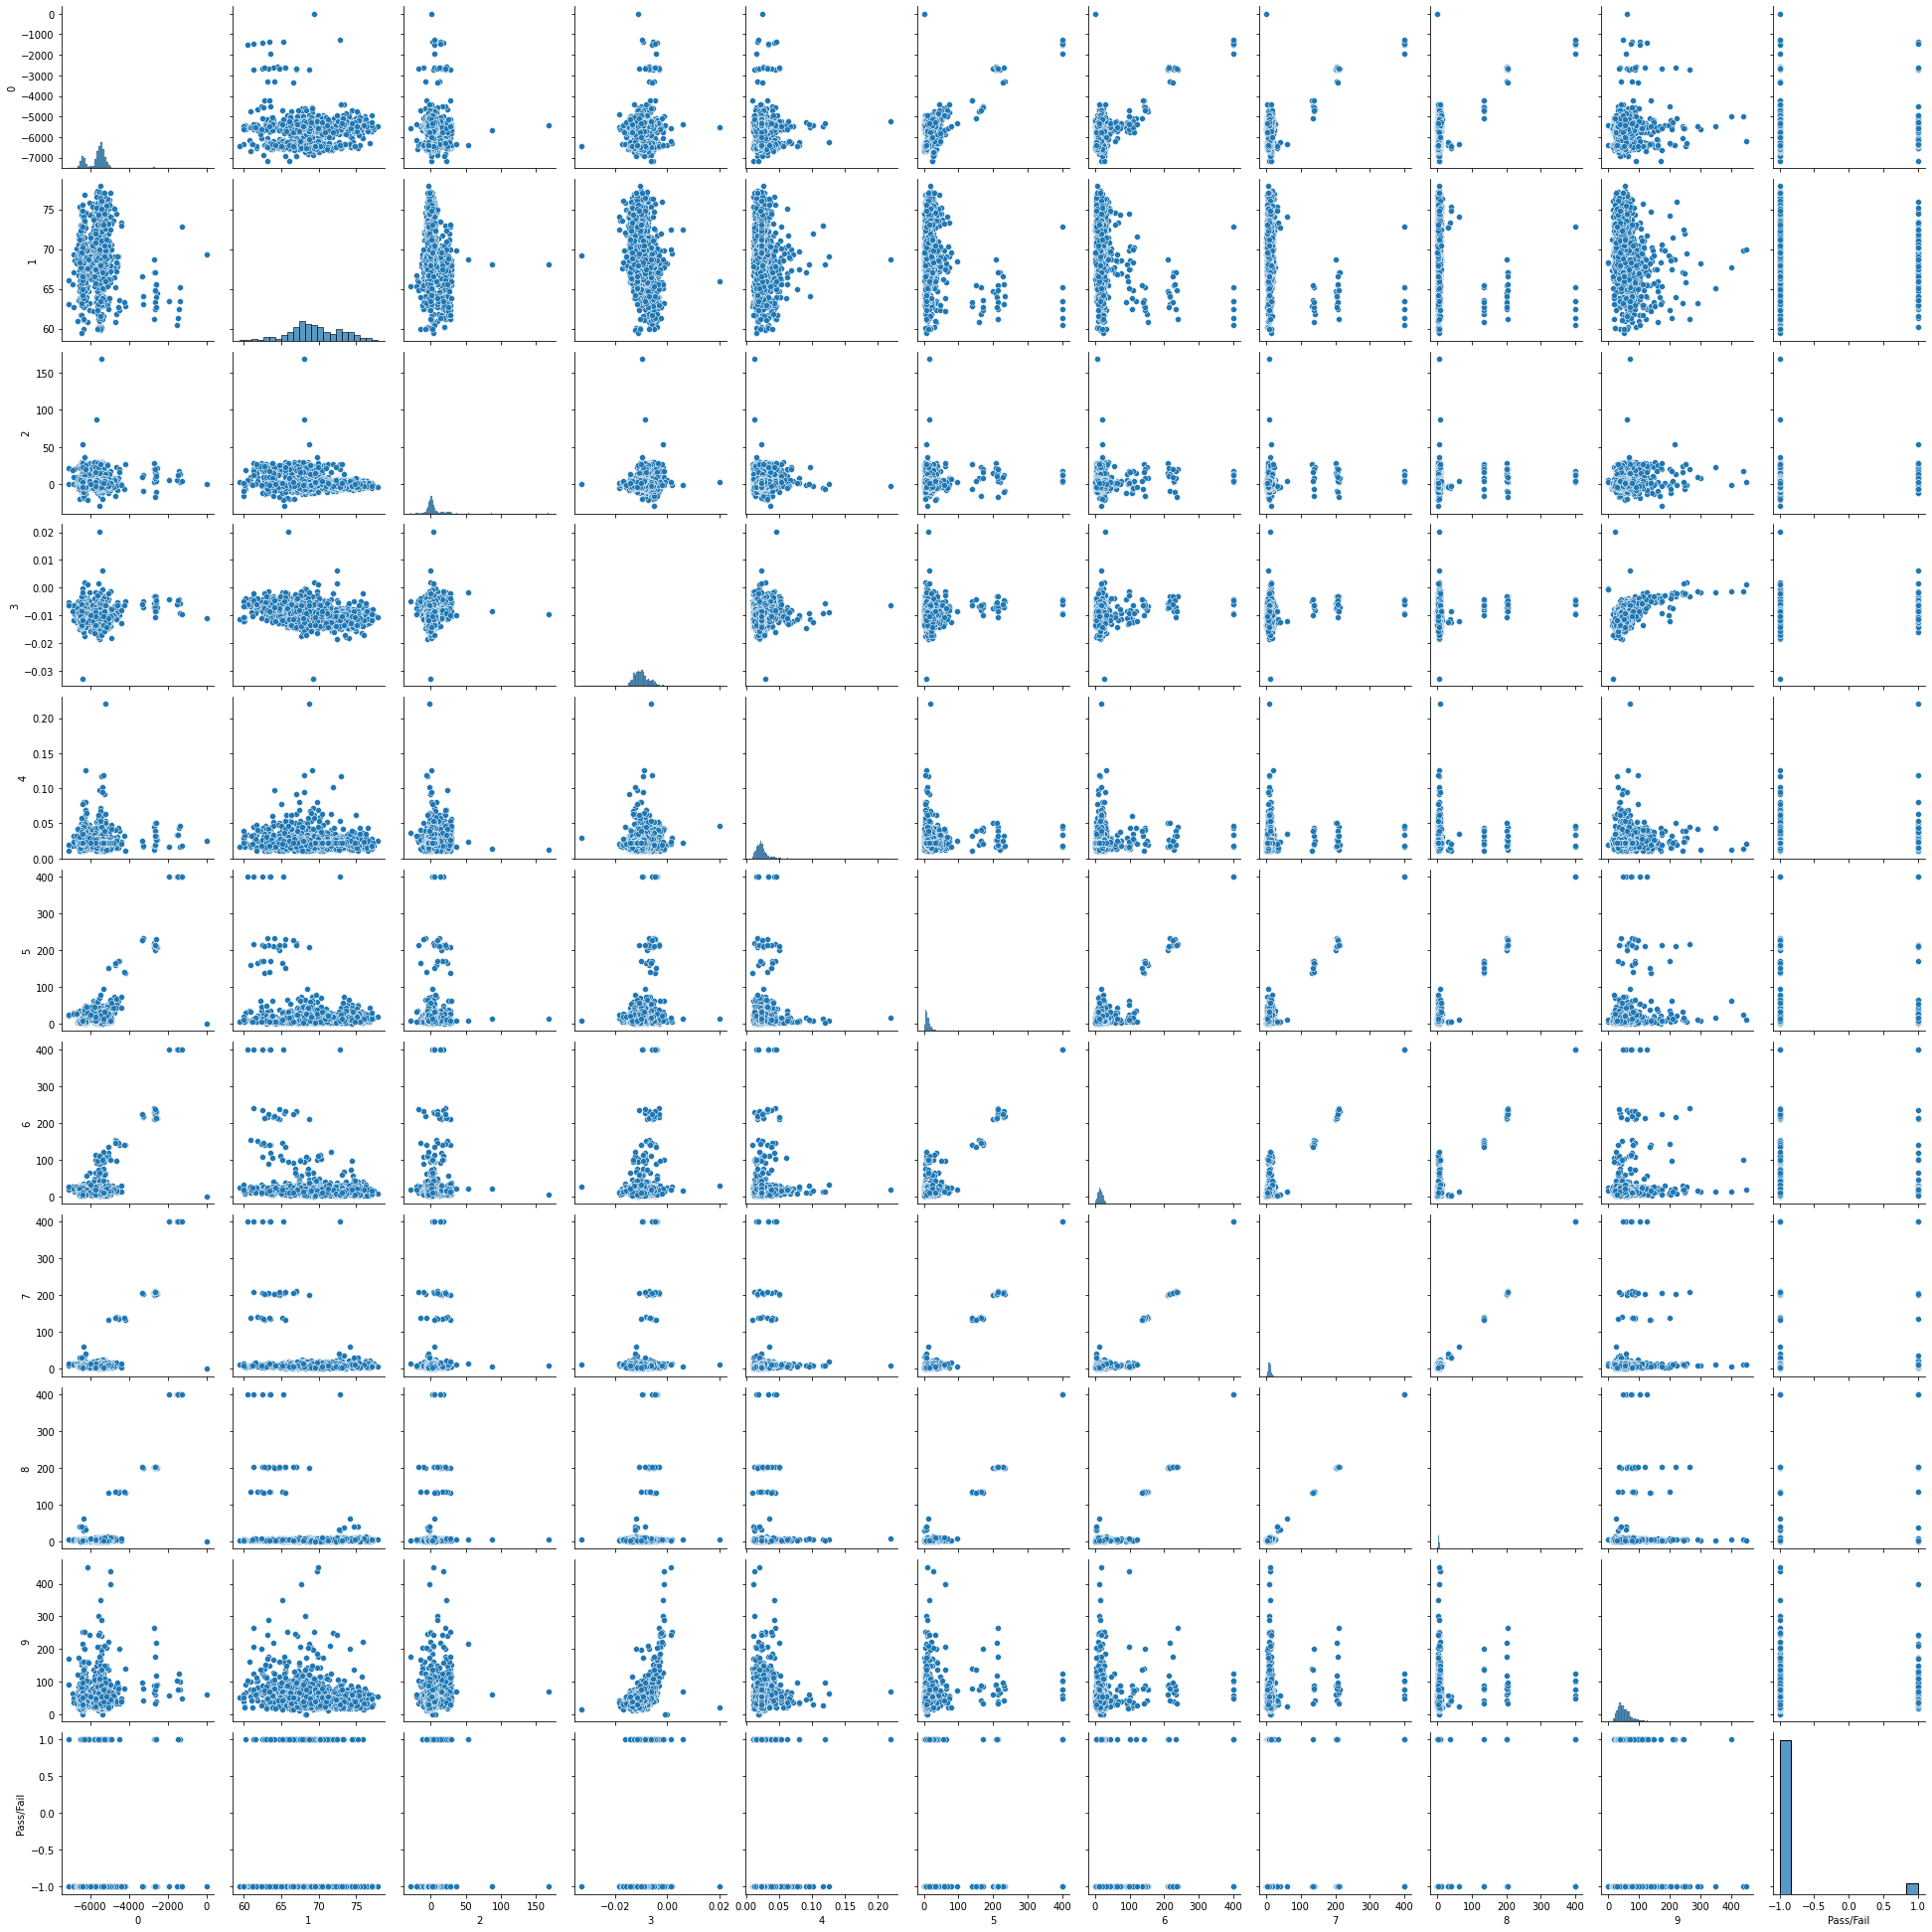

In [283]:
sns.pairplot(pd.DataFrame(total))

# Z score による外れ値

In [182]:
zscore_df = all_df.drop(['Time','Pass/Fail'], axis=1)
zscore_df = stats.zscore(zscore_df, nan_policy='omit')
for i in zscore_df.columns:
    zscore_df[i] = zscore_df[i].apply(lambda x: 1 if abs(x) >= 3 else 0)
zscore_df

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1563,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1565,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


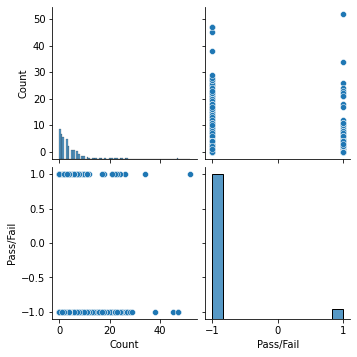

In [183]:
outlier_count = pd.DataFrame(zscore_df.sum(axis=1), columns=['Count'])
outlier_count['Pass/Fail'] = all_df['Pass/Fail']
sns.pairplot(outlier_count)

# データ整理

In [ ]:
for i in all_df.columns:
    if 0 < all_df[i].value_counts().shape[0] <= 2:
        print(i, all_df[i].value_counts().shape[0])

5 1
13 1
42 1
49 1
52 1
69 1
74 2
97 1
141 1
149 1
178 1
179 1
186 1
189 1
190 1
191 1
192 1
193 1
194 1
206 2
209 2
226 1
229 1
230 1
231 1
232 1
233 1
234 1
235 1
236 1
237 1
240 1
241 1
242 1
243 1
256 1
257 1
258 1
259 1
260 1
261 1
262 1
263 1
264 1
265 1
266 1
276 1
284 1
313 1
314 1
315 1
322 1
325 1
326 1
327 1
328 1
329 1
330 1
342 2
347 2
364 1
369 1
370 1
371 1
372 1
373 1
374 1
375 1
378 1
379 1
380 1
381 1
394 1
395 1
396 1
397 1
398 1
399 1
400 1
401 1
402 1
403 1
404 1
414 1
422 1
449 1
450 1
451 1
458 1
461 1
462 1
463 1
464 1
465 1
466 1
478 2
481 1
498 1
501 1
502 1
503 1
504 1
505 1
506 1
507 1
508 1
509 1
512 1
513 1
514 1
515 1
528 1
529 1
530 1
531 1
532 1
533 1
534 1
535 1
536 1
537 1
538 1
Pass/Fail 2


In [273]:
temp_df = filled_null_df.drop('Time', axis=1)
for i in temp_df.columns:
    if temp_df[i].std() == 0:
        temp_df = temp_df.drop(i, axis=1)

In [274]:
for i in temp_df.columns:
    if 0 < temp_df[i].value_counts().shape[0] <= 2:
        print(i, temp_df[i].value_counts().shape[0])

74 2
206 2
209 2
342 2
347 2
478 2
Pass/Fail 2


In [ ]:
#remove low variance columns

In [ ]:
#extract columns with too large outliers, check their fail ratio, 
# if most of them are pass, treat those outliers as measurement error

